# Introdução



Já não é novidade que em muitos projetos de dados e de machine learning, temos que lidar com milhões e milhares, centenas de milhares e até milhões de features em nossos datasets. Dentro do contexto do pipeline de construção de um modelo de machine learning, essa quantidade altíssima de features tende a deixar o treinamento dos modelos extremamente lento. Além disso, a alta dimensionalidade dos dados pode até dificultar (levar a conclusões equivocadas, por exemplo) o design de uma solução que atende o problema de negócio, pois reduz a performance do modelo, como veremos. Esse problema, em específico, é conhecido como maldição da dimensionalidade. Felizmente, em problemas reais, graças as técnicas de análise de features (seleção de features, por exemplo), é possível reduzir drasticamente o número de features, o que facilitará a modelagem.

Um exemplo de redução de dimensionalidade e como ela pode nos ajudar, eliminando features redundantes ou inúteis, é o caso do dataset MNIST. Nesse dataset, temos imagens de dígitos escritos à mão. Esse é um dataset bem famoso, que é muito usado em problemas de classificação com imagens. O objetivo geral é identificar qual dígito está na imagem. A questão é que existem pixels inúteis nas imagens. As bordas, por exemplo, são quase sempre brancas. Não seria sensato descartas esses pixels das bordas? Acredito que sim, pois eles não trazem nenhuma informação relevante para resolução do problema. Com certeza poderemos dropar esses pixels, reduzindo a dimensionalidade das imagens, sem perder muita informação. Quando dropar não é uma opção, devido a alta correlação entre pixels vizinhos, podemos combiná-los, usando uma métrica como ma média, para reduzir a dimensionalidade do conjunto de dados. Se fizermos isso, não perderemos muita informação.

Note, pelo feature importance, que os pixels na borda não são tão importantes e podemos excluí-los das nossas imagens, a fim de promover a redução de dimensionalidade, o que reduzira o ruído e reduzirá o tempo de treinamento dos modelos.

> **ATENÇÃO** 
<br>
A redução de dimensionalidade necessariamente causa `PERDA DE INFORMAÇÃO`. Então, mesmo com todo o bônus, também há a possibilidade (veja, estamos falando de uma possibilidade), de que nosso sistema, como um todo, acabe perdendo performance (nosso modelo fique menos acurado, por exemplo).Além disso, o processo de redução de dimensionalidade também acrescenta um step no pipeline de desenvolvimento e deploy. Em muitos casos, o treino, apesar do dataset contar com várias features, não sofrerá muito. Nessas ocasiões, é melhor checar o tempo de treinamento e então decidir pela redução de dimensionalidade. Em alguns casos, a redução de dimensionalidade em si serve como um filtro para ruído (quando nossos dados são bem sujos e não tão confiáveis), o que pode nos trazer um ganho de performance. Lembre-se, porém, que isso não é uma garantia. A única garantia é a de que reduziremos o tempo de treinamento.

Além do benefício da redução do tempo de treinamento, a redução de dimensionalidade é muito usada para visualização de dados, podendo ser incorporada na etapa de análise exploratória. Nós, seres humanos, somos seres tridimensionais e em um cenário multidimensional, temos dificuldade de interpretar as formas e também de visualizá-las. Com o auxílio da redução de dimensionalidade, podemos enxergar padrões multidimensionais em 2D ou 3D. Um padrão interessante para se observar é a existência de clusters. Isso ai!! Apesar de termos sofrido um pouco nas aulas passadas com o step de ajuste do número de clusters ou até mesmo o questionamento de se faz mesmo sentido clusterizar determinado dataset, ou se a qualidade dos clusters formados era boa ou não, agora podemos utilizar alguma ténica de redução de dimensionalidade para, literalmente, enxergar nossos clusters e ver se vale a pena ou não realizar esse step. Como passo de exploração, também é posisvel explorarmos as característiacas principais dos agrupamentos formados.

<img src="https://leakyreluhome.files.wordpress.com/2019/11/kmeans_3.png?w=398">


## Maldição da Dimensionalidade (Curse of Dimensionality) 
A maldição da dimensionalidade se refere a vários fenômenos que surgem ao analisar e organizar dados em espaços de alta dimensão (geralmente com centenas ou milhares de dimensões) que não ocorrem em ambientes de baixa dimensão, como o espaço físico tridimensional da experiência cotidiana. A expressão foi cunhada por Richard E. Bellman ao considerar problemas na programação dinâmica.

Os fenômenos amaldiçoados ocorrem em domínios como análise numérica, amostragem, combinatória, aprendizado de máquina, mineração de dados e bancos de dados. O tema comum desses problemas é que, quando a dimensionalidade aumenta, o volume do espaço aumenta tão rapidamente que os dados disponíveis se tornam escassos. Essa escassez é problemática para qualquer método que exija significância estatística.

Para obter um resultado estatisticamente sólido e confiável, a quantidade de dados necessária para suportar o resultado geralmente cresce exponencialmente com a dimensionalidade. Além disso, a organização e a pesquisa de dados geralmente dependem da detecção de áreas em que os objetos formam grupos com propriedades semelhantes; em dados de alta dimensão, no entanto, todos os objetos parecem esparsos e diferentes de várias maneiras, o que impede que estratégias comuns de organização de dados sejam eficientes.

Para mais informações leia [Course of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#targetText=Cursed%20phenomena%20occur%20in%20domains,the%20available%20data%20become%20sparse.)



Acontece que muitas coisas se comportam de maneira muito diferente no espaço de alta dimensão. Por exemplo, se você escolher um ponto aleatório em um quadrado unitário (um quadrado 1 × 1), ele terá apenas cerca de 0,4% de chance de estar localizado a menos de 0,001 de uma borda (em outras palavras, é muito improvável que um ponto aleatório será "extremo" ao longo de qualquer dimensão). Mas em um hipercubo de unidade de 10.000 dimensões, essa probabilidade é maior do que 99,999999%. A maioria dos pontos em um hipercubo de alta dimensão está muito perto da fronteira. Aqui está uma diferença mais problemática: se você escolher dois pontos aleatoriamente em um quadrado unitário, a distância entre esses dois pontos será, em média, cerca de 0,52. Se você escolher dois pontos aleatórios em um cubo 3D unitário, a distância média será de aproximadamente 0,66. Mas e quanto a dois pontos escolhidos aleatoriamente em um hipercubo de 1.000.000 de dimensão? A distância média, acredite ou não, será de cerca de 408,25. Isso é contra-intuitivo: como dois pontos podem estar tão distantes quando ambos estão dentro do mesmo hipercubo unitário?


Bem, há muito espaço em grandes dimensões. Como resultado, os conjuntos de dados de alta dimensão correm o risco de serem muito esparsos: a maioria das instâncias de treinamento provavelmente estão distantes umas das outras. Isso também significa que uma nova instância provavelmente estará longe de qualquer instância de treinamento, tornando as previsões muito menos confiáveis ​​do que em dimensões inferiores, uma vez que serão baseadas em extrapolações muito maiores. Em suma, quanto mais dimensões o conjunto de treinamento tiver, maior o risco de sobreajuste.


Em teoria, uma solução para a maldição da dimensionalidade poderia ser aumentar o tamanho do conjunto de treinamento para chegar a uma densidade suficiente. Infelizmente, na prática, o número de instâncias de treinamento necessárias para atingir uma determinada densidade aumenta exponencialmente com o número de dimensões. Com apenas 100 recursos (significativamente menos do que no problema MNIST), você precisaria de mais instâncias de treinamento do que átomos no universo observável para que as instâncias de treinamento estivessem dentro de 0,1 um do outro em média, supondo que estivessem espalhados uniformemente em todas as dimensões.




# Redução de Dimensionalidade

## Projeção

Na maioria dos problemas do mundo real, as instâncias de treinamento não são distribuídas uniformemente em todas as dimensões. Muitos recursos são quase constantes, enquanto outros são altamente correlacionados (conforme discutido anteriormente para MNIST). Como resultado, todas as instâncias de treinamento estão dentro (ou perto de) um subespaço de dimensão muito inferior do espaço de alta dimensão. 

Observe que todas as instâncias de treinamento ficam próximas a um plano: este é um subespaço de dimensão inferior (2D) do espaço de dimensão alta (3D). Se projetarmos cada instância de treinamento perpendicularmente neste subespaço (conforme representado pelas linhas curtas que conectam as instâncias ao plano), obteremos o novo conjunto de dados 2D. Acabamos de reduzir a dimensionalidade do conjunto de dados de 3D para 2D. Observe que os eixos correspondem aos novos recursos z1 e z2 (as coordenadas das projeções no plano).

No entanto, a projeção nem sempre é a melhor abordagem para a redução da dimensionalidade. Veja o caso abaixo.

Às vezes, a projeção em um plano acaba escondendo a relação dos dados e os padrões que só seriam visíveis ou detectáveis em maior dimensionalidade. Nesses cenários, uma outra transformação de eixos é necessária.

# Principal Component Analysis (PCA)

A idéia principal da análise de componentes principais (PCA) é reduzir a dimensionalidade de um conjunto de dados que consiste em muitas variáveis correlacionadas entre si, de maneira pesada ou leve, mantendo a variação presente no conjunto de dados, até o máximo. O mesmo é feito transformando as variáveis em um novo conjunto de variáveis, conhecidas como componentes principais (ou simplesmente, os PCs) e ortogonais, ordenadas de modo que a retenção da variação presente nas variáveis originais diminua à medida que avançamos na ordem. Assim, o primeiro componente principal retém a variação máxima que estava presente nos componentes originais. Os principais componentes são os autovetores de uma matriz de covariância e, portanto, são ortogonais.

Importante, o conjunto de dados no qual a técnica PCA deve ser usada deve ser escalado. Os resultados também são sensíveis à escala relativa. Como leigo, é um método de resumir dados. Imagine algumas garrafas de vinho em uma mesa de jantar. Cada vinho é descrito por seus atributos como cor, força, idade etc. Mas a redundância surgirá porque muitos deles medem propriedades relacionadas. Portanto, o que a PCA fará neste caso é resumir cada vinho do estoque com menos características.

Intuitivamente, a Análise de Componentes Principais pode fornecer ao usuário uma imagem de dimensão inferior, uma projeção ou "sombra" deste objeto quando vista do seu ponto de vista mais informativo.



*Fonte da imagem: Palestras de aprendizado de máquina do professor Andrew NG da Universidade de Stanford*

- Dimensionalidade: é o número de variáveis aleatórias em um conjunto de dados ou simplesmente o número de recursos, ou mais simplesmente, o número de colunas presentes no seu conjunto de dados.


- Correlação: Mostra o quão fortemente duas variáveis estão relacionadas uma à outra. O valor dos mesmos intervalos para -1 a +1. Positivo indica que quando uma variável aumenta, a outra também aumenta, enquanto negativo indica que a outra diminui ao aumentar a primeira. E o valor do módulo de indica a força da relação.


- Ortogonal: (obtenha código de amostra) Sem correlação entre si, ou seja, a correlação entre qualquer par de variáveis é 0.


- Autovetores: Os autovetores e os autovalores são, em si, um grande domínio, vamos nos restringir ao conhecimento do mesmo que exigiríamos aqui. Portanto, considere um vetor diferente de zero v. É um vetor próprio de uma matriz quadrada A, se Av for um múltiplo escalar de v. Ou simplesmente: Av = ƛv. Aqui, v é o vetor próprio e ƛ é o valor próprio associado a ele.


- Matriz de covariância: Essa matriz consiste nas covariâncias entre os pares de variáveis. O elemento (i, j) é a covariância entre a variável i-ésima j-ésima.

Para aprofudar mais os conceitos de álgebra linear acesse o canal do YouTube [3Blue!Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/featured)


## Propriedades do componente principal

A ideia central do PCA é encontrar os "sentidos" de maior variação nos dados. As componentes principais apontam justamente nesse sentido. A construção das componente é basicamente uma combinação dos eixos originais. Isso dará origem a um novo eixo de coordenadas.

Tecnicamente, um componente principal pode ser definido como uma combinação linear de variáveis observadas com o peso ideal. A saída do PCA são esses componentes principais, cujo número é menor ou igual ao número de variáveis originais. Menos, caso desejemos descartar ou reduzir as dimensões em nosso conjunto de dados.
Os famosos Scores de Crédito podem ser escrito como combinações lineares das características dos clientes, por exemplo.


Os PCs possuem algumas propriedades úteis listadas abaixo:
- Os PCs são essencialmente as combinações lineares das variáveis originais; o vetor de pesos nessa combinação é na verdade o vetor próprio encontrado, que por sua vez satisfaz o princípio dos mínimos quadrados.


- Os PCs são ortogonais, como já discutido.


- A variação presente nos CPs diminui à medida que passamos do 1º PC para o último, daí a importância.


Às vezes, os PCs menos importantes também são úteis em regressão, detecção de outlier etc.

Para ler mais acesse [Principal Component Analysis Tutorial](https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial)


## Benefícios do PCA

- Combater a Maldição da Dimensionalidade

- Reduzir o Overfit de modelos

- Extratir as variáveis mais explicativas para um modelo de acordo com a variância

- Aumento da densidade dos dados

## Limitações do PCA

- Precisão da classificação: A estrutura do PCA baseado em variância não considera as características diferenciadoras das classes. Além disso, as informações que distinguem uma classe da outra podem estar nos componentes de baixa variação e podem ser descartadas.

- Outliers: o PCA também é afetado por outliers, e a normalização dos dados precisa ser um componente essencial de qualquer fluxo de trabalho.

- Interpretabilidade: Cada componente principal é uma combinação de recursos originais e não permite que a importância do recurso individual seja reconhecida.

## Variações

O PCA, assim como outros algoritmos, também possuem variações de implementação. Essas variações foram surgindo ao longo do tempo como forma de contornar problemas enfrentados pela implementação mais clássifica desse algoritmo, como rapidez, precisão em conservar os padrões, entre outras. Lembre-se que o PCA é uma combinação LINEAR. Será que não dá pra ter um PCA não-linear? SIM! Vamos ver a seguir.

- **Randomized PCA:**<br>
Se você definir o hiperparâmetro svd_solver como" randomized ", o Scikit-Learn usa um algoritmo estocástico chamado Randomized PCA que encontra rapidamente uma aproximação dos primeiros d componentes principais. Sua complexidade é extremamente menor que a implementação original.
Como padrão, svd_solver é definido como" auto ": Scikit-Learn usa automaticamente o algoritmo RandomizedPCA se algumas condições de complexidade forem satisfeitas. Se você quiser forçar o Scikit-Learn a usar SVD completo, você pode definir o hiperparâmetro svd_solver para "full"

- **Incremental PCA:**<br>
Uma dificuldade presente nas abordagens anteriores é que elas necessitam que todo o conjunto de treinamento caiba na memória para que o algoritmo seja executado. Dado isso, para algumas aplicações, fica muito pesado rodar o dataset. Imagine milhões de linhas!. Para isso, podemos utilizar a variação Incremental PCA (IPCA). Eles permitem que você divida o conjunto de treinamento em batches (pequenos lotes) e, a partir daí, a cada novo batch o PCA é atualizado, até atingir a sua forma completa. É muito útil em aplicações online.

- **Kernel PCA:**<br>
A palavra Kernel já é uma velha conhecida. Como discutimos em SVM, a ideia é aplicar uma transformação nos dados para que eles ganhem sparsidade.  Essa técnica permitia que realizássemos uma classificação linearmente separável num espaço de mais alta dimensionalidade e quando retornávamos ao espaço original, tínhamos construído uma fronteira de decisão não-linear.
Acontece que o mesmo truque pode ser aplicado ao PCA, tornando possível realizar projeções não lineares complexas para redução de dimensionalidade. Essa variação se chama Kernel PCA. Geralmente é usado para preservar clusters após a projeção ou, às vezes, até mesmo para "desenrolar" conjuntos de dados que ficam próximos a uma variedade distorcida.


OBS: Existem técnicas não-lineares, como autoencoder, que são bem difundidas (deep learning), mas que precisam de muitos dados.

-----------------------
# Prática Guiada: Wine Class Dataset

Pra começar, iremos explorar um __[dataset](https://www.kaggle.com/brynja/wineuci)__ com características de vinhos e sua respectiva classe. O objetivo dessa primeira parte é entender quais características fazem de um vinho uma bebida de qualidade. Vamos importar o dataset e já chamar o método `.info()`:

------------

## Lendo e verificando os dados

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# plotando os gráficos do matplotlib


In [2]:
wine = pd.read_csv('http://www.dropbox.com/s/2h6q8m6d9c5420x/Wine.csv?dl=1',
                   names=['class','alcohol','malic_acid','ash','ash_alcalinity',
                          'magnesium','total_phenols','flavanoids','nonflavanoids_phenols',
                          'proanthocyanins','color_intensity','hue','dilution','proline'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class                  178 non-null    int64  
 1   alcohol                178 non-null    float64
 2   malic_acid             178 non-null    float64
 3   ash                    178 non-null    float64
 4   ash_alcalinity         178 non-null    float64
 5   magnesium              178 non-null    int64  
 6   total_phenols          178 non-null    float64
 7   flavanoids             178 non-null    float64
 8   nonflavanoids_phenols  178 non-null    float64
 9   proanthocyanins        178 non-null    float64
 10  color_intensity        178 non-null    float64
 11  hue                    178 non-null    float64
 12  dilution               178 non-null    float64
 13  proline                178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Para um melhor entendimento do dataset, vamos chamar seu método `.head()`

In [3]:
# verificando os dados do DataFrame
wine.head()

,class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,dilution,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

-------

## Aplicando o PCA 




### PCA com 2 componentes

In [5]:
# verificando as colunas do DataFrame
wine.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'dilution', 'proline'],
      dtype='object')

In [75]:
# dividindo o DataSet em dois componentes
# X: todas as variáveis exceto CLASS
# Y: variável target CLASS
X = wine.iloc[:, 1:]
y = wine.iloc[:, 0] 

In [7]:
# Aplicando o PCA

# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
pca2 = PCA(n_components = 2)
# vamos usar o standard Scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_pca2 = std_scaler.fit_transform(X)
# ajustando com os dados de treino
X_pca2 = pca2.fit_transform(X_pca2)

In [8]:
X_pca2

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [9]:
pca_df2 = pd.DataFrame(X_pca2,columns=['pca_1','pca_2'])
pca_df2['class'] = wine['class']
pca_df2.head()

,pca_1,pca_2,class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [10]:
pca_df2['class'].value_counts(sort=False)

1    59
2    71
3    48
Name: class, dtype: int64

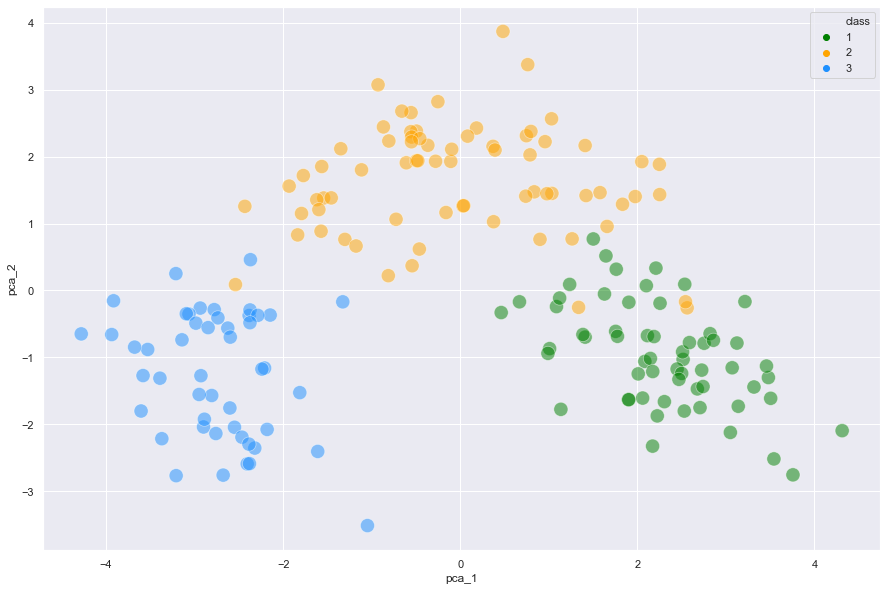

In [11]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="pca_1", y="pca_2", data=pca_df2, hue='class',\
                     palette=['green','orange','dodgerblue'], s=200, alpha=.5)

-----------

## PCA com 3 componentes

In [12]:
# Aplicando o PCA

# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
pca3 = PCA(n_components = 3)
# standard scaler
std_scaler = StandardScaler()
X_pca3 = std_scaler.fit_transform(X)
# ajustando e transformando os dados de treino
X_pca3 = pca3.fit_transform(X_pca3)

In [13]:
pca_df3 = pd.DataFrame(X_pca3,columns=['pca_1','pca_2','pca_3'])
pca_df3['class'] = wine['class']
pca_df3.head()

,pca_1,pca_2,pca_3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [14]:
pca_df3['class'].value_counts(sort=False)

1    59
2    71
3    48
Name: class, dtype: int64

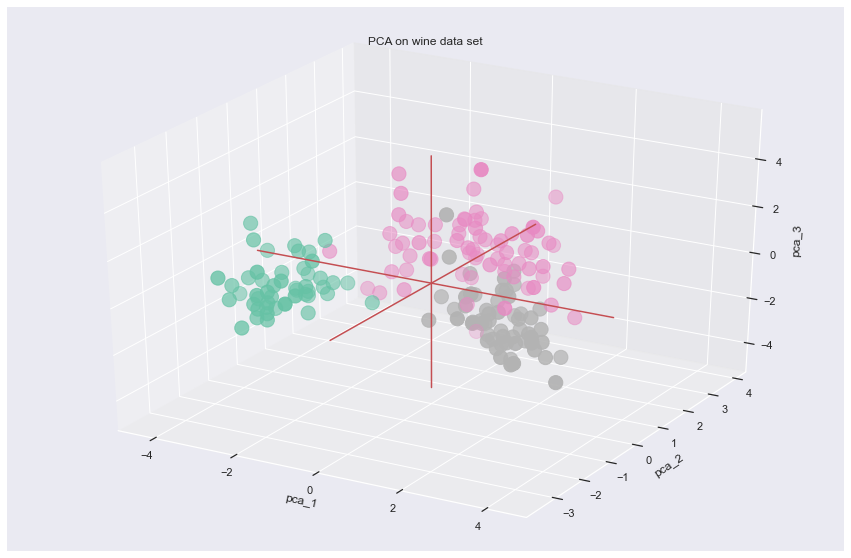

In [15]:
# Plot initialisation
from mpl_toolkits.mplot3d import Axes3D

my_color=pca_df3['class']
labels = [pca_df3['pca_1'], pca_df3['pca_2'], pca_df3['pca_3']]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df3['pca_1'], pca_df3['pca_2'], pca_df3['pca_3'], c=my_color, cmap="Set2_r", s=200, label=labels)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pca_df3['pca_1']), max(pca_df3['pca_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df3['pca_2']), max(pca_df3['pca_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df3['pca_3']), max(pca_df3['pca_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
ax.set_title("PCA on wine data set")
plt.show()


Podemos ver os resultados das combinações lineares.

In [16]:
pd.DataFrame(pca3.components_, columns=X.columns)

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,dilution,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746


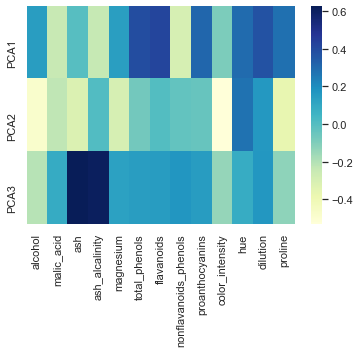

In [33]:

ax = sns.heatmap(pca3.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca3.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "vertical"})
#ax.set_aspect("equal")
#plt.show()

Beleza, mas estamos retendo o suficiente em 2D e 3D? Será que não estamos perdendo informação?

In [17]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

A primeira componente é a que retém mais informação, quase 99.8%. À medida que vamos adicionando mais componentes, vamos nos aproximando do 100%

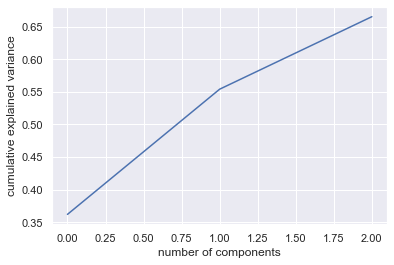

In [18]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


Como podemos definir o número de componentes, tal que elas expliquem um determinado % de variância total?

In [19]:
pca = PCA(n_components = 0.99999)
std_scaler = StandardScaler()
X_pca = std_scaler.fit_transform(X)
pca.fit(X_pca)
X_reduced = pca.transform(X_pca)

In [20]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

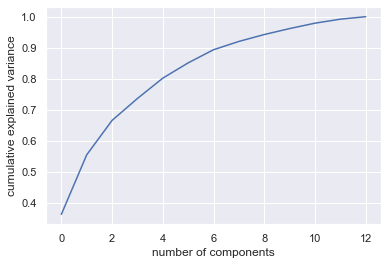

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


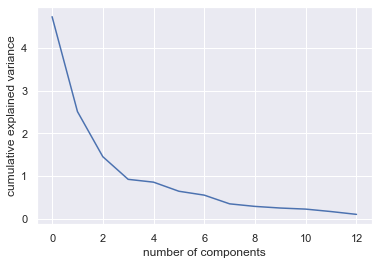

In [23]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Quando a variância para de crescer no mesmo ritmo é o ponto de parada!

Mas, professor, você falou que o PCA reduz a dimensionalidade, porém há perda de informação. Isso irá impactar nossos modelos??

## Incremental PCA

In [92]:
from sklearn.decomposition import IncrementalPCA


In [93]:
n_batches = 5
inc_pca = IncrementalPCA(n_components=3)

In [94]:
X_scaled = std_scaler.fit_transform(X)
for X_batch in np.array_split(X_scaled, n_batches):
    inc_pca.partial_fit(X_batch)

X_IPCA = inc_pca.transform(X_scaled)



In [95]:
ipca_df = pd.DataFrame(X_IPCA,columns=['pca_1','pca_2','pca_3'])
ipca_df['class'] = wine['class']
ipca_df.head()

,pca_1,pca_2,pca_3,class
0,3.420437,1.135470,-0.001322,1
1,2.225977,-0.674482,-1.846395,1
2,2.565297,0.987325,0.816076,1
3,3.931298,2.474619,-0.399544,1
4,1.023880,0.984817,2.057116,1


In [81]:
pca_df3

,pca_1,pca_2,pca_3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


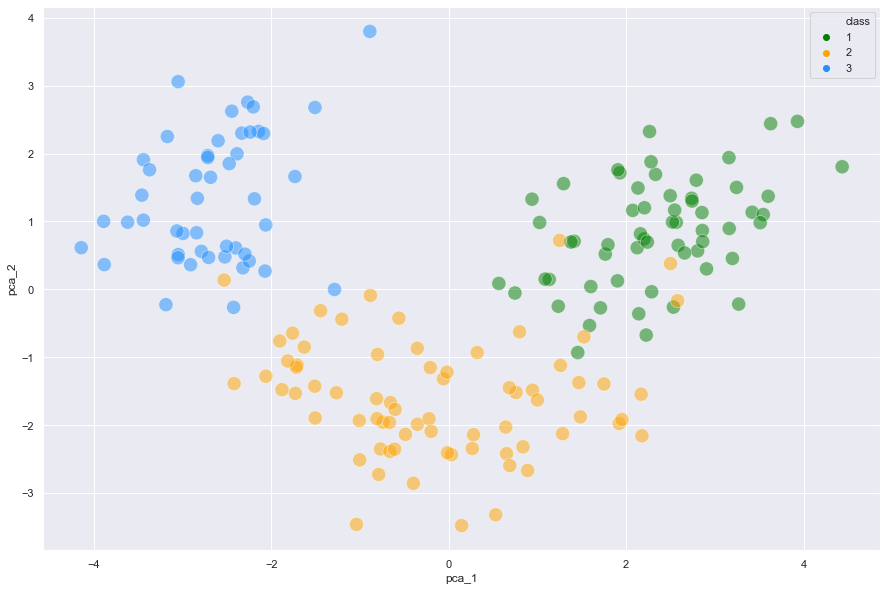

In [80]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="pca_1", y="pca_2", data=ipca_df, hue='class',\
                     palette=['green','orange','dodgerblue'], s=200, alpha=.5) 

Note que as projeções foram diferentes! Por que isso ocorre?

## EDA Com PCA

In [37]:
pca3.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [67]:
!pip install pca

from pca import pca

X_pca_biplot = StandardScaler().fit_transform(X)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X_pca_biplot)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [76]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.99)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

X_biplot = pd.DataFrame(data=X_pca, columns=X.columns, index=y)

# Fit transform
results = model.fit_transform(X_biplot)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


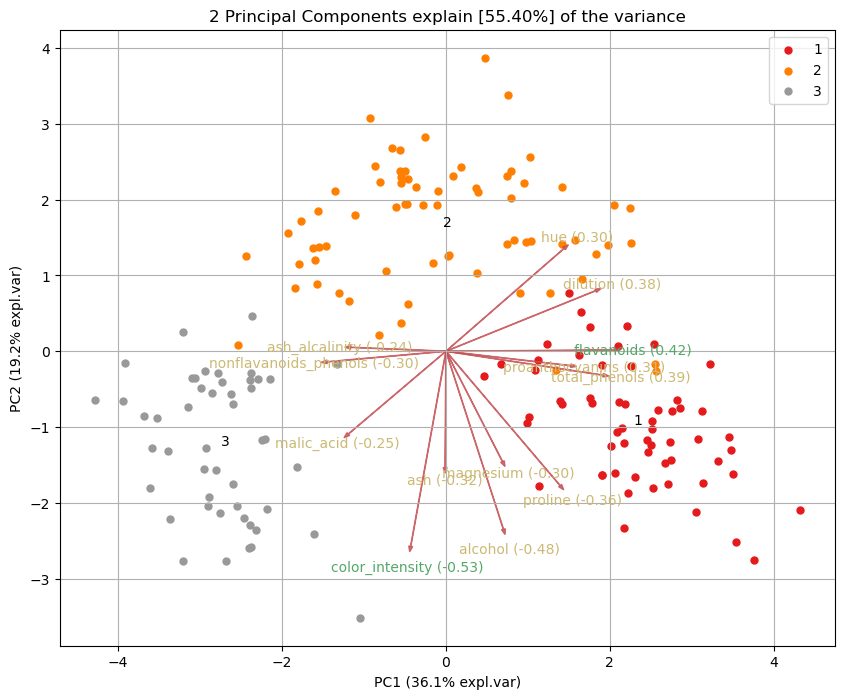

In [78]:
# Make biplot with the number of features
fig, ax = model.biplot(n_feat=len(X.columns))